In [63]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import missingno
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [64]:
train = pd.read_csv("E:\\Analytics India\\Project\\HR Analytics\\train_LZdllcl.csv")
test = pd.read_csv("E:\\Analytics India\\Project\\HR Analytics\\test_2umaH9m.csv")
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [65]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [66]:
train.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [67]:
train.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [68]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


([<matplotlib.patches.Wedge at 0x1a544017190>,
 [Text(-1.0608579614755376, 0.2908270715974823, '0'),
  Text(1.1090787921396856, -0.3040464320230975, '1')],
 [Text(-0.578649797168475, 0.15863294814408124, '91.48%'),
  Text(0.6268706216441701, -0.1718523311434899, '8.52%')])

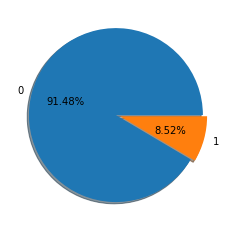

In [69]:
from collections import Counter
output = Counter(train.is_promoted)
classes=[]
count=[]
for key in output.keys():
    classes.append(key)
    count.append(output[key])
plt.pie(count,labels=classes,autopct="%0.2f%%",shadow=True,explode=[0,0.05])

In [70]:
df_bin= pd.DataFrame()
df_con = pd.DataFrame()

In [71]:
df_cat=train[["department","education","region","gender","recruitment_channel"]]
df_num=train[['no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted']]

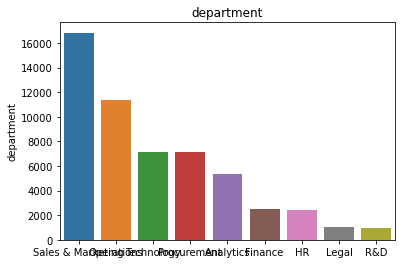

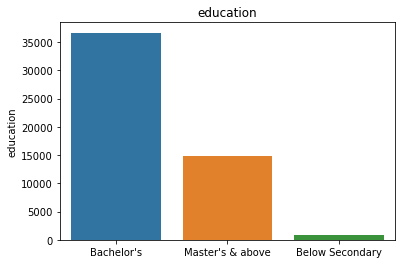

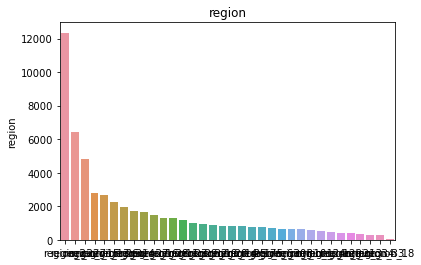

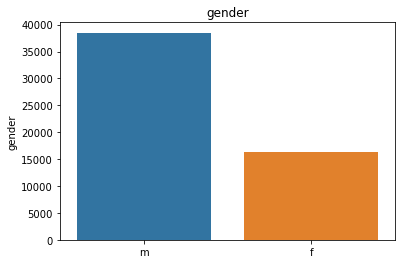

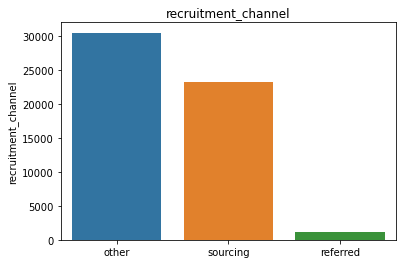

In [72]:
for i in df_cat.columns:
    sns.barplot(df_cat[i].value_counts().index,df_cat[i].value_counts()).set_title(i)
    plt.show()
    


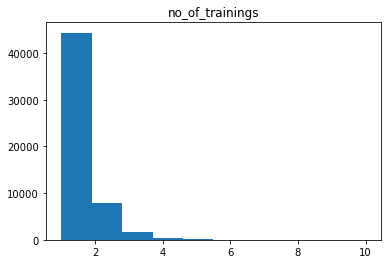

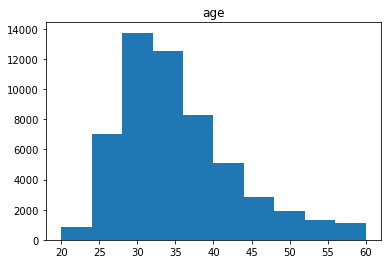

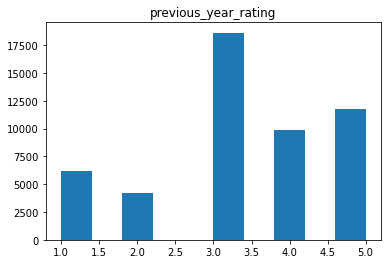

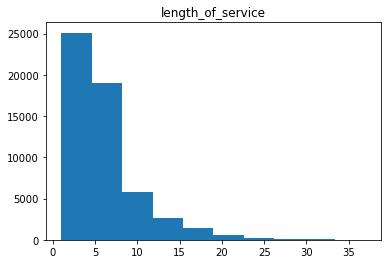

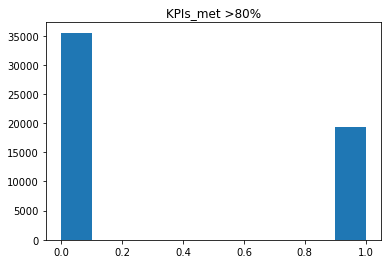

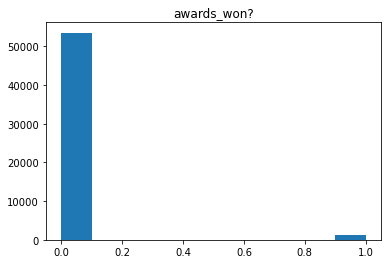

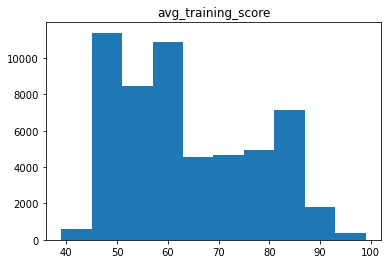

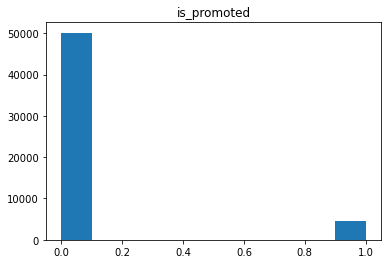

In [73]:
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

In [74]:
mode = train.education.mode().values[0]
train["education"].fillna(mode,inplace=True)
median=train.previous_year_rating.median()
train["previous_year_rating"].fillna(median,inplace=True)

In [75]:
train.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [76]:
df_bin["is_promoted"] = train.is_promoted
df_bin["department"]=train.department
df_bin["region"]=train.region
df_bin["education"]=train.education
df_bin["gender"] = train.gender
df_bin["recruitment_channel"] = train.recruitment_channel
df_bin["no_of_trainings"] = train.no_of_trainings
df_bin["age"]=train.age
df_bin["previous_year_rating"]=train.previous_year_rating
df_bin["length_of_service"]=train.length_of_service
df_bin["KPIs_met >80%"] =train['KPIs_met >80%']
df_bin["awards_won?"] = train["awards_won?"]
df_bin["avg_training_score"] = train["avg_training_score"]
df_bin.head()

,is_promoted,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49
1,0,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60
2,0,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50
3,0,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50
4,0,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73


In [77]:
df_con["is_promoted"] = train.is_promoted
from sklearn.preprocessing import LabelEncoder

de = LabelEncoder()
train["department"] = de.fit_transform(train["department"])
df_con["department"] = train["department"]
re = LabelEncoder()
train["region"] = re.fit_transform(train["region"])
df_con["region"] = train["region"]
edu = LabelEncoder()
train["education"] = edu.fit_transform(train["education"])
df_con["education"] = train["education"]
gen = LabelEncoder()
train["gender"] = gen.fit_transform(train["gender"])
df_con["gender"] = train["gender"]
rec = LabelEncoder()
train["recruitment_channel"] =rec.fit_transform(train["recruitment_channel"])
df_con["recruitment_channel"] = train["recruitment_channel"]
no = LabelEncoder()
train["no_of_trainings"] = no.fit_transform(train["no_of_trainings"])
df_con["no_of_trainings"] = train["no_of_trainings"]
age = LabelEncoder()
train["age"] = age.fit_transform(train["age"])
df_con["age"] = train["age"]
pre = LabelEncoder()
train["previous_year_rating"] = pre.fit_transform(train["previous_year_rating"])
df_con["previous_year_rating"]=train.previous_year_rating
length = LabelEncoder()
train["length_of_service"] = length.fit_transform(train["length_of_service"])
df_con["length_of_service"]=train.length_of_service
df_con["KPIs_met >80%"] =train['KPIs_met >80%']
awa = LabelEncoder()
train["awards_won?"] = awa.fit_transform(train["awards_won?"])
df_con["awards_won?"] = train["awards_won?"]
avg =LabelEncoder()
train["avg_training_score"] = avg.fit_transform(train["avg_training_score"])
df_con["avg_training_score"] = train["avg_training_score"]

df_con.head()

,is_promoted,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,0,7,31,2,0,2,0,15,4,7,1,0,10
1,0,4,14,0,1,0,0,10,4,3,0,0,21
2,0,7,10,0,1,2,0,14,2,6,0,0,11
3,0,7,15,0,1,0,1,19,0,9,0,0,11
4,0,8,18,0,1,0,0,25,2,1,0,0,34


In [78]:
df_con.head()

,is_promoted,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,0,7,31,2,0,2,0,15,4,7,1,0,10
1,0,4,14,0,1,0,0,10,4,3,0,0,21
2,0,7,10,0,1,2,0,14,2,6,0,0,11
3,0,7,15,0,1,0,1,19,0,9,0,0,11
4,0,8,18,0,1,0,0,25,2,1,0,0,34


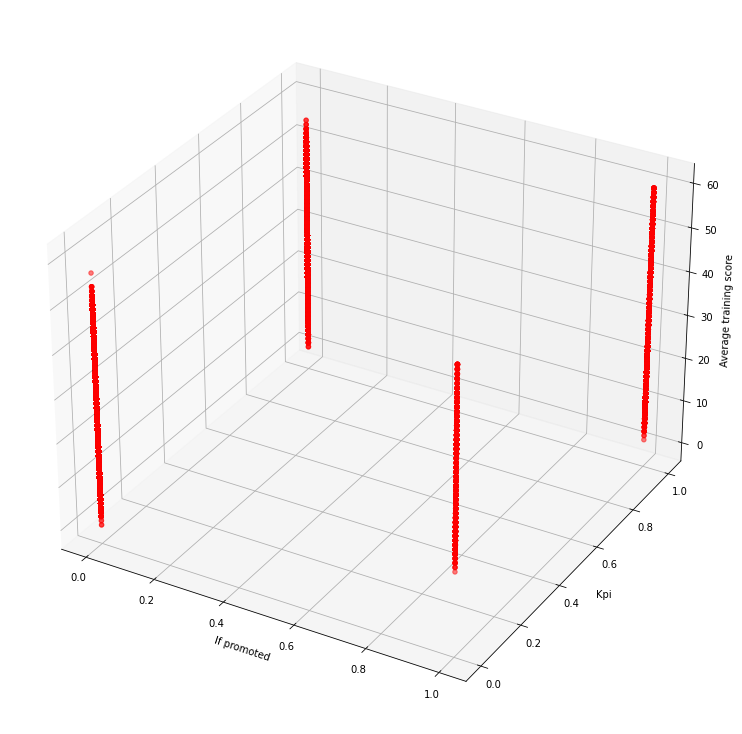

In [79]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,10))
ax = Axes3D(fig)
ax.scatter(train["is_promoted"], 
           train["KPIs_met >80%"], 
           train["avg_training_score"],
           c="red",
           s=20,
           alpha=0.5)
ax.set(xlabel="If promoted",ylabel="Kpi ",zlabel="Average training score")
plt.show()

In [80]:
x = df_con.drop(["is_promoted"],axis=1)
y = df_con["is_promoted"]

In [81]:
x.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,7,31,2,0,2,0,15,4,7,1,0,10
1,4,14,0,1,0,0,10,4,3,0,0,21
2,7,10,0,1,2,0,14,2,6,0,0,11
3,7,15,0,1,0,1,19,0,9,0,0,11
4,8,18,0,1,0,0,25,2,1,0,0,34


In [82]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: is_promoted, dtype: int64

In [83]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler

In [84]:
from scipy.stats import randint

est = RandomForestClassifier(n_jobs=-1)
rf_p_dist = {
    "max_depth":[3,5,10,None],
    "n_estimators":[10,50,100,200],
    "max_features":randint(1,3),
    "criterion":["gini","entropy"],
    "bootstrap":[True,False],
    "min_samples_leaf":randint(1,4)
}
def hypertuning_rscv(est,p_dist,nbr_itr,a,b):
    rdsearch = RandomizedSearchCV(est,param_distributions=p_dist,n_jobs=-1,n_iter=nbr_itr,cv=10)
    rdsearch.fit(x,y)
    ht_params = rdsearch.best_params_
    ht_score = rdsearch.best_score_
    print("best params:", ht_params, "best score:",ht_score)

rf_parameter,rf_score = hypertuning_rscv(est,rf_p_dist,40,x,y)
    

best params: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': None, 'max_features': 2, 'min_samples_leaf': 1, 'n_estimators': 200} best score: 0.9316522805391418


TypeError: cannot unpack non-iterable NoneType object

In [85]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=5,test_size=0.25,random_state=0)
print(cross_val_score(RandomForestClassifier(criterion='entropy',n_estimators=200,bootstrap=False,max_depth=None,max_features=2,min_samples_leaf=3),x,y,cv=cv))
print(cross_val_score(RandomForestClassifier(criterion='entropy',n_estimators=200,bootstrap=False,max_depth=None,max_features=2,min_samples_leaf=3),x,y,cv=cv).mean())

[0.9337323  0.93059407 0.93424318 0.92760181 0.93176179]
0.931659611735513


In [86]:
est = DecisionTreeClassifier()
rf_p_dist = {
    "max_depth":[3,5,10,None],
    "splitter":["best","random"],
    
    "max_features":randint(1,3),
    "criterion":["gini","entropy"],
    
    "min_samples_leaf":randint(1,4)
}
def hypertuning_rscv(est,p_dist,nbr_itr,a,b):
    rdsearch = RandomizedSearchCV(est,param_distributions=p_dist,n_jobs=-1,n_iter=nbr_itr,cv=10)
    rdsearch.fit(x,y)
    ht_params = rdsearch.best_params_
    ht_score = rdsearch.best_score_
    print("best params:", ht_params, "best score:",ht_score)

rf_parameter,rf_score = hypertuning_rscv(est,rf_p_dist,40,x,y)

best params: {'criterion': 'gini', 'max_depth': 10, 'max_features': 2, 'min_samples_leaf': 3, 'splitter': 'best'} best score: 0.9217085532369952


TypeError: cannot unpack non-iterable NoneType object

In [87]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=5,test_size=0.25,random_state=0)
print(cross_val_score(RandomForestClassifier(criterion= 'entropy', max_depth=10,max_features=2,min_samples_leaf=3,),x,y,cv=cv))
print("Mean avg score: ",cross_val_score(RandomForestClassifier(criterion= 'gini', max_depth=10,max_features=1,min_samples_leaf=2),x,y,cv=cv).mean())

[0.92730988 0.92329587 0.92679901 0.91986571 0.92387973]
Mean avg score:  0.922609837979857


In [88]:
est = LogisticRegression()
rf_p_dist = {
    "C":[1,0.1,10,100,0.01],
    "solver":['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    "penalty":['l1', 'l2', 'elasticnet', 'none']
}
def hypertuning_rscv(est,p_dist,nbr_itr,a,b):
    rdsearch = RandomizedSearchCV(est,param_distributions=p_dist,n_jobs=-1,n_iter=nbr_itr,cv=10)
    rdsearch.fit(x,y)
    ht_params = rdsearch.best_params_
    ht_score = rdsearch.best_score_
    print("best params:", ht_params, "best score:",ht_score)

rf_parameter,rf_score = hypertuning_rscv(est,rf_p_dist,40,x,y)

best params: {'solver': 'sag', 'penalty': 'l2', 'C': 0.01} best score: 0.9176580210068759


TypeError: cannot unpack non-iterable NoneType object

In [89]:
est = GradientBoostingClassifier()
rf_p_dist = {
     "learning_rate":[0.1,0.05,0.2],
     "n_estimators":range(20,81,10),
     'max_depth':range(5,16,2), 
     'min_samples_split':range(200,1001,200)
    
}
def hypertuning_rscv(est,p_dist,nbr_itr,a,b):
    rdsearch = RandomizedSearchCV(est,param_distributions=p_dist,n_jobs=-1,n_iter=nbr_itr,cv=10)
    rdsearch.fit(x,y)
    ht_params = rdsearch.best_params_
    ht_score = rdsearch.best_score_
    print("best params:", ht_params, "best score:",ht_score)

rf_parameter,rf_score = hypertuning_rscv(est,rf_p_dist,40,x,y)

best params: {'n_estimators': 50, 'min_samples_split': 400, 'max_depth': 7, 'learning_rate': 0.2} best score: 0.9419062734303105


TypeError: cannot unpack non-iterable NoneType object

In [90]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=5,test_size=0.25,random_state=0)
print(cross_val_score(GradientBoostingClassifier(n_estimators=80,min_samples_split=1000,max_depth=5, learning_rate=0.2),x,y,cv=cv))
print("Mean avg score: ",cross_val_score(GradientBoostingClassifier(n_estimators=80,min_samples_split=1000,max_depth=5, learning_rate=0.2),x,y,cv=cv).mean())

[0.9443147  0.94176033 0.94263611 0.93854912 0.94168734]
Mean avg score:  0.9417895197781346


In [91]:
est = KNeighborsClassifier()
rf_p_dist = {
     'n_neighbors':range(1,21,2),
     'weights':['uniform', 'distance'],
     'metric':['euclidean', 'manhattan', 'minkowski']
    
}
def hypertuning_rscv(est,p_dist,nbr_itr,a,b):
    rdsearch = RandomizedSearchCV(est,param_distributions=p_dist,n_jobs=-1,n_iter=nbr_itr,cv=10)
    rdsearch.fit(x,y)
    ht_params = rdsearch.best_params_
    ht_score = rdsearch.best_score_
    print("best params:", ht_params, "best score:",ht_score)

rf_parameter,rf_score = hypertuning_rscv(est,rf_p_dist,40,x,y)

best params: {'weights': 'distance', 'n_neighbors': 11, 'metric': 'manhattan'} best score: 0.9258320049221131


TypeError: cannot unpack non-iterable NoneType object

In [92]:
x.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,7,31,2,0,2,0,15,4,7,1,0,10
1,4,14,0,1,0,0,10,4,3,0,0,21
2,7,10,0,1,2,0,14,2,6,0,0,11
3,7,15,0,1,0,1,19,0,9,0,0,11
4,8,18,0,1,0,0,25,2,1,0,0,34


In [93]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: is_promoted, dtype: int64

In [94]:
reg = GradientBoostingClassifier(n_estimators=80,min_samples_split=1000,max_depth=5, learning_rate=0.2)
reg.fit(x,y)

GradientBoostingClassifier(learning_rate=0.2, max_depth=5,
                           min_samples_split=1000, n_estimators=80)

In [95]:
def feature_importance(model,data):
    fea_imp = pd.DataFrame({'imp':model.feature_importances_,'col':data.columns})
    fea_imp.sort_values(['imp','col'],ascending=[True,False]).iloc[-30:]
    _ = fea_imp.plot(kind="barh",x='col',y='imp',figsize=(20,10))
    return fea_imp

,imp,col
0,0.192838,department
1,0.015436,region
2,0.001194,education
3,0.004131,gender
4,0.000979,recruitment_channel
5,0.002561,no_of_trainings
6,0.013186,age
7,0.051986,previous_year_rating
8,0.012669,length_of_service
9,0.132305,KPIs_met >80%


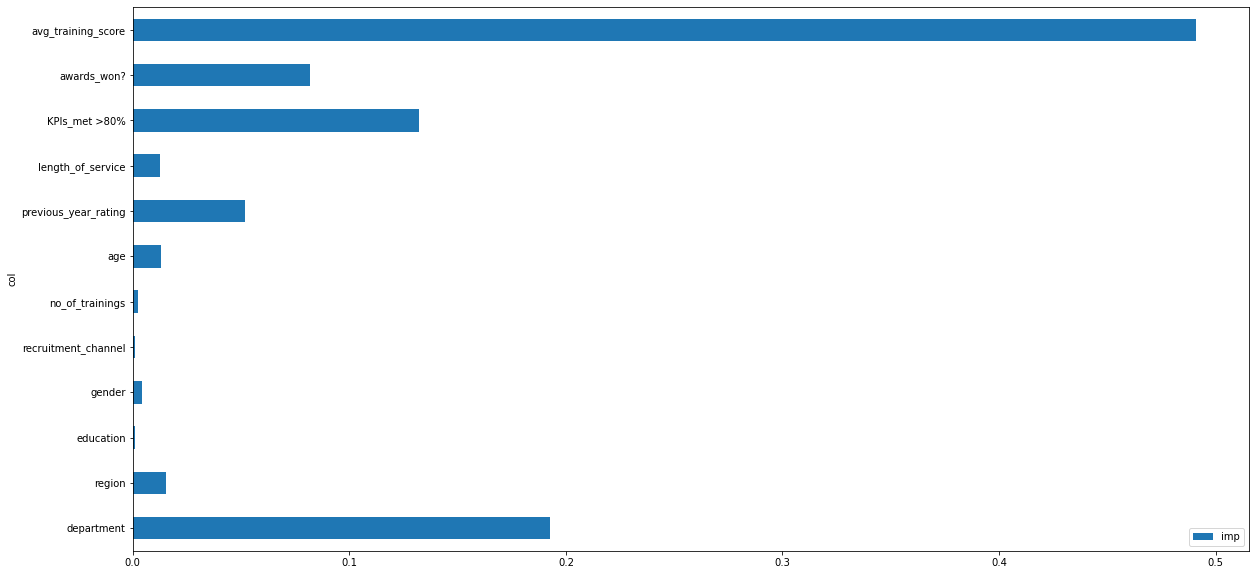

In [96]:
feature_importance(reg,x)

In [97]:
test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [98]:
test.isnull().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [99]:
mode1 = test.education.mode().values[0]
test["education"].fillna(mode1,inplace=True)
median1=test.previous_year_rating.median()
test["previous_year_rating"].fillna(median1,inplace=True)

In [100]:
test.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
dtype: int64

In [101]:
test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,3.0,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [102]:
wanted_col = x.columns
wanted_col

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score'],
      dtype='object')

In [103]:
predicted = reg.predict(test[wanted_col].apply(LabelEncoder().fit_transform))

In [104]:
predicted[:200]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [105]:
submission_HR = pd.DataFrame()
submission_HR["employee_id"] = test["employee_id"]
submission_HR["is_promoted"] = predicted
submission_HR.head()

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0


In [ ]:
submission_HR.to_csv("E:\\Analytics India\\Project\\Loan\\submission_HR.csv",index=False)
print("submission csv is ready")